# Evaluation: Precision & Recall
## Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics
### We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 


In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist['data'], mnist['target']

### Now take a look at the shapes of the X and y matricies 

In [2]:
X.shape

(70000, 784)

In [3]:
y.shape

(70000,)

### Now, let's pick one entry and see what number is written. Use indexing to pick the 36000th digit

In [4]:
X[36000]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

### You can use the .reshape(28,28) function and plt.imshow() function with the parameters cmap = matplotlib.cm.binary, interpolation="nearest" to make a plot of the number. Be sure to import matplotlib!

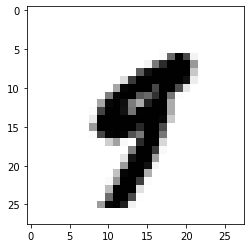

In [5]:
import matplotlib
from matplotlib import pyplot as plt

plt.imshow(X[36000].reshape(28,28), cmap=matplotlib.cm.binary, interpolation='nearest');

### Use indexing to see if what the plot shows matches with the outcome of the 36000th index

In [6]:
y[36000]

'9'

### Now lets break into a test train split to run a classification. Instead of using sklearn, use indexing to select the first 60000 entries for the training, and the rest for training.

In [7]:
X_train = X[:60000]
X_test = X[60000:]
y_train = y[:60000]
y_test = y[60000:]

### We are going to make a two-class classifier, so lets restrict to just one number, for example 5s. Do this by defining a new y training and y testing sets for just the number 5

In [8]:
y_train_5 = np.where(y_train == '5', 1, 0)
y_test_5 = np.where(y_test == '5', 1, 0)

### Lets train a logistic regression to predict if a number is a 5 or not (remember to use the 'just 5s' y training set!)

In [9]:
from sklearn.linear_model import LogisticRegression

just_model_5 = LogisticRegression().fit(X_train, y_train_5)

### Does the classifier predict correctly the 36000th digit we picked before?

In [10]:
y_pred_5 = just_model_5.predict(X_train)

print(y_pred_5[36000])
print(y[36000])

0
9


In [11]:
# The prediction seems to be incorrect.

In [12]:
y_pred_5 = just_model_5.predict(X_test)

### To make some comparisons, we are going to make a very dumb classifier, that never predicts 5s. Build the classifier with the code below, and call it using: never_5_clf = Never5Classifier()

In [13]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()

### Now lets fit and predict on the testing set using our never 5 Classifier

In [14]:
y_no_pred_5 = just_model_5.predict(X_test)

### Let's compare this to the Logistic Regression. Examine the confusion matrix, precision, recall, and f1_scores for each. What is the probability cutoff you are using to decide the classes?

In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print('Logistic Regression\n')
print(confusion_matrix(y_test_5, y_pred_5))
print(precision_score(y_test_5, y_pred_5))
print(recall_score(y_test_5, y_pred_5))
print(f1_score(y_test_5, y_pred_5))
print()
print('*' * 79)
print()
print('Dumb Classifier\n')
print(confusion_matrix(y_test_5, y_no_pred_5))
print(precision_score(y_test_5, y_no_pred_5))
print(recall_score(y_test_5, y_no_pred_5))
print(f1_score(y_test_5, y_no_pred_5))

Logistic Regression

[[9034   74]
 [ 147  745]]
0.9096459096459096
0.8352017937219731
0.8708357685563999

*******************************************************************************

Dumb Classifier

[[9034   74]
 [ 147  745]]
0.9096459096459096
0.8352017937219731
0.8708357685563999


### What are the differences you see? Without knowing what each model is, what can these metrics tell you about how well each works?

### Now let's examine the roc_curve for each. Use the roc_curve method from sklearn.metrics to help plot the curve for each

In [16]:
from sklearn import metrics

fpr_5, tpr_5, thresholds_5 = metrics.roc_curve(y_test_5, y_pred_5)

fpr_no_5, tpr_no_5, thresholds_no_5 = metrics.roc_curve(y_test_5, y_no_pred_5)

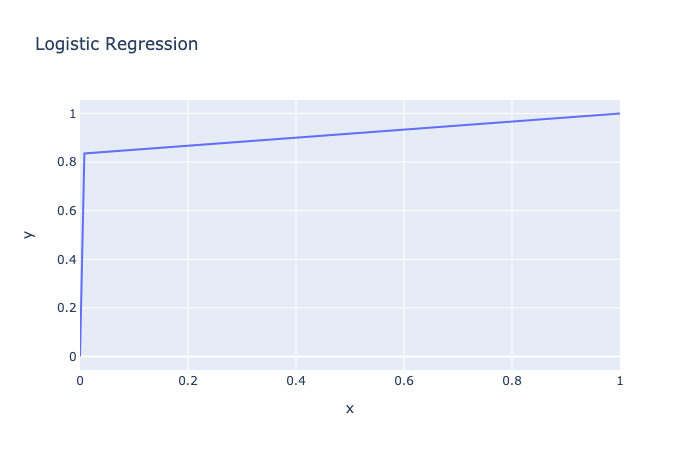

In [17]:
import plotly.express as px

fig = px.line(x=fpr_5, y=tpr_5, title='Logistic Regression')
fig.show(renderer='png')

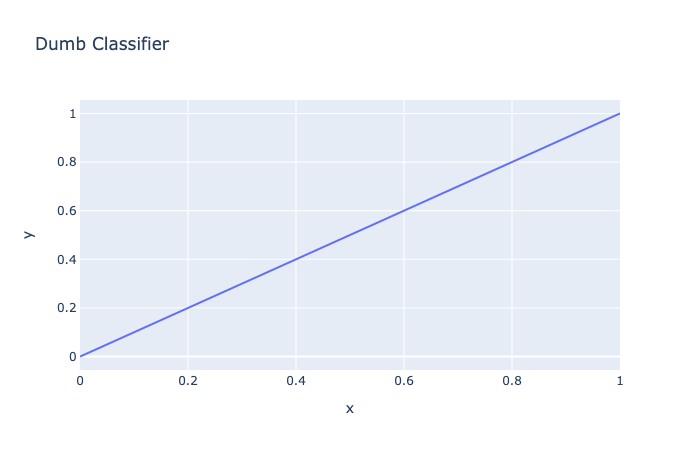

In [18]:
fig = px.line(x=fpr_no_5, y=fpr_no_5, title='Dumb Classifier')
fig.show(renderer='png')

### Now find the roc_auc_score for each. 

In [19]:
from sklearn.metrics import roc_auc_score

print(roc_auc_score(y_test_5, y_pred_5))

print(metrics.auc(fpr_5, tpr_5))

0.9135385341029717
0.9135385341029717


### What does this metric tell you? Which classifier works better with this metric in mind?